import os

# Input data files are available in the "../input/" directory.
print('Directory Path where files are located')
for dirname, _, filenames in os.walk('/kaggle/input/allstate-claims-severity'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# Any results you write to the current directory are saved as output.
# Validate working directory
os.getcwd() 
print(os.getcwd())
# Validate Current Path and create Path to data
from pathlib import Path
INPUT = Path("../input/allstate-claims-severity")
os.listdir(INPUT)

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn import linear_model
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import r2_score 
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler


import scipy.stats as st

import warnings
warnings.filterwarnings('ignore')
print('-'*25)

C:\Users\james\anaconda3\lib\site-packages\numpy\_distributor_init.py:30: UserWarning: loaded more than 1 DLL from .libs:
C:\Users\james\anaconda3\lib\site-packages\numpy\.libs\libopenblas.PYQHXLVVQ7VESDPUVUADXEVJOBGHJPAY.gfortran-win_amd64.dll
C:\Users\james\anaconda3\lib\site-packages\numpy\.libs\libopenblas.WCDJNK7YVMPZQ2ME2ZZHJJRJ3JIKNDB7.gfortran-win_amd64.dll
  warnings.warn("loaded more than 1 DLL from .libs:"


-------------------------


In [2]:
#load training and test set
train = pd.read_csv("train.csv")
test = pd.read_csv("test.csv")
sample_submission = pd.read_csv('sample_submission.csv')

In [3]:
train.shape

(188318, 132)

In [4]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 188318 entries, 0 to 188317
Columns: 132 entries, id to loss
dtypes: float64(15), int64(1), object(116)
memory usage: 189.7+ MB


In [5]:
#Create Independent and dependent variables
x = train.drop(['loss'], axis = 1)
y = train['loss']

In [6]:
train.describe()

,id,cont1,cont2,cont3,cont4,cont5,cont6,cont7,cont8,cont9,cont10,cont11,cont12,cont13,cont14,loss
count,188318.000000,188318.000000,188318.000000,188318.000000,188318.000000,188318.000000,188318.000000,188318.000000,188318.000000,188318.000000,188318.000000,188318.000000,188318.000000,188318.000000,188318.000000,188318.000000
mean,294135.982561,0.493861,0.507188,0.498918,0.491812,0.487428,0.490945,0.484970,0.486437,0.485506,0.498066,0.493511,0.493150,0.493138,0.495717,3037.337686
std,169336.084867,0.187640,0.207202,0.202105,0.211292,0.209027,0.205273,0.178450,0.199370,0.181660,0.185877,0.209737,0.209427,0.212777,0.222488,2904.086186
min,1.000000,0.000016,0.001149,0.002634,0.176921,0.281143,0.012683,0.069503,0.236880,0.000080,0.000000,0.035321,0.036232,0.000228,0.179722,0.670000
25%,147748.250000,0.346090,0.358319,0.336963,0.327354,0.281143,0.336105,0.350175,0.312800,0.358970,0.364580,0.310961,0.311661,0.315758,0.294610,1204.460000
50%,294539.500000,0.475784,0.555782,0.527991,0.452887,0.422268,0.440945,0.438285,0.441060,0.441450,0.461190,0.457203,0.462286,0.363547,0.407403,2115.570000
75%,440680.500000,0.623912,0.681761,0.634224,0.652072,0.643315,0.655021,0.591045,0.623580,0.566820,0.614590,0.678924,0.675759,0.689974,0.724623,3864.045000
max,587633.000000,0.984975,0.862654,0.944251,0.954297,0.983674,0.997162,1.000000,0.980200,0.995400,0.994980,0.998742,0.998484,0.988494,0.844848,121012.250000


In [7]:
train.head()

,id,cat1,cat2,cat3,cat4,cat5,cat6,cat7,cat8,cat9,...,cont6,cont7,cont8,cont9,cont10,cont11,cont12,cont13,cont14,loss
0,1,A,B,A,B,A,A,A,A,B,...,0.718367,0.335060,0.30260,0.67135,0.83510,0.569745,0.594646,0.822493,0.714843,2213.18
1,2,A,B,A,A,A,A,A,A,B,...,0.438917,0.436585,0.60087,0.35127,0.43919,0.338312,0.366307,0.611431,0.304496,1283.60
2,5,A,B,A,A,B,A,A,A,B,...,0.289648,0.315545,0.27320,0.26076,0.32446,0.381398,0.373424,0.195709,0.774425,3005.09
3,10,B,B,A,B,A,A,A,A,B,...,0.440945,0.391128,0.31796,0.32128,0.44467,0.327915,0.321570,0.605077,0.602642,939.85
4,11,A,B,A,B,A,A,A,A,B,...,0.178193,0.247408,0.24564,0.22089,0.21230,0.204687,0.202213,0.246011,0.432606,2763.85


In [8]:
train.describe().columns

Index(['id', 'cont1', 'cont2', 'cont3', 'cont4', 'cont5', 'cont6', 'cont7',
       'cont8', 'cont9', 'cont10', 'cont11', 'cont12', 'cont13', 'cont14',
       'loss'],
      dtype='object')

In [9]:
train.isnull()

,id,cat1,cat2,cat3,cat4,cat5,cat6,cat7,cat8,cat9,...,cont6,cont7,cont8,cont9,cont10,cont11,cont12,cont13,cont14,loss
0,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
188313,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
188314,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
188315,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
188316,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


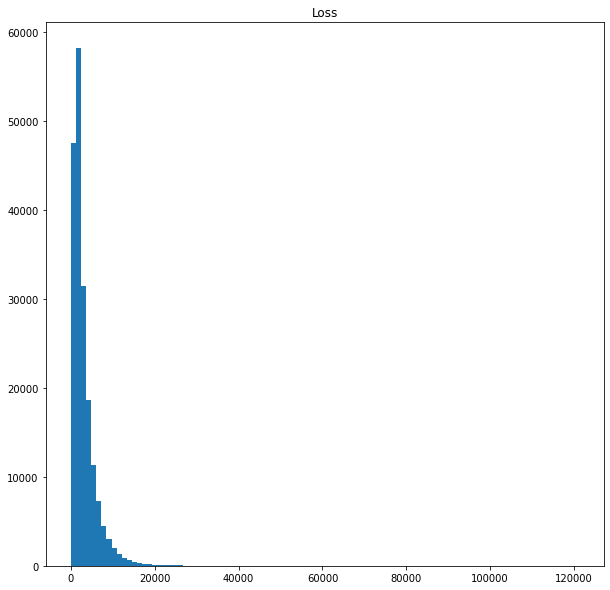

In [10]:
plt.figure(figsize=(10,10))
plt.hist(train.loss, bins=100)
plt.title("Loss")
plt.show()

In [11]:
print('Before transformation \n')
print('Loss Skewness ',train['loss'].skew())
print('Loss Kurtosis ',train['loss'].kurt())

Before transformation 

Loss Skewness  3.7949583775378604
Loss Kurtosis  48.07956782541841


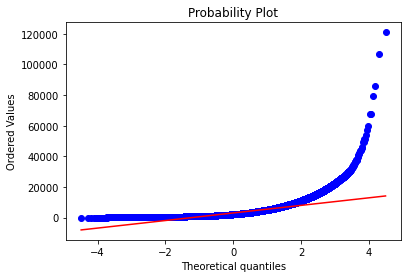

In [12]:
fig = plt.figure()
ax = fig.add_subplot(111)
st.probplot(train['loss'], dist = st.norm, plot = ax)
plt.show()

In [13]:
# log transform the label variable
#train['loss'] = np.log1p(train['loss'])

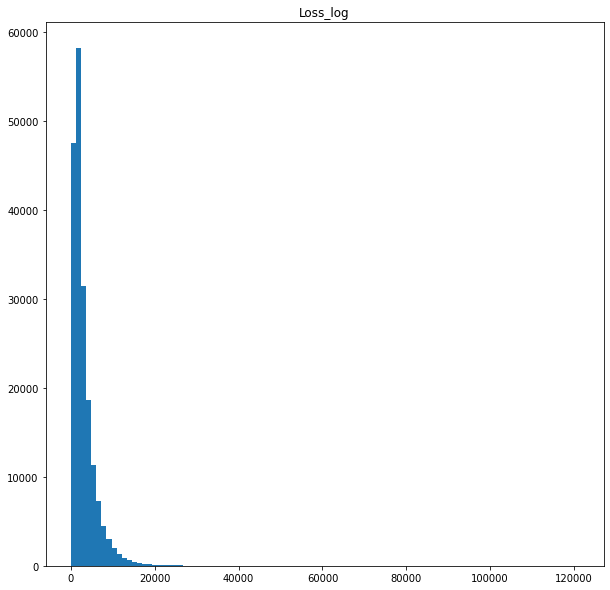

In [14]:
plt.figure(figsize=(10,10))
plt.hist(train.loss, bins=100)
plt.title("Loss_log")
plt.show()

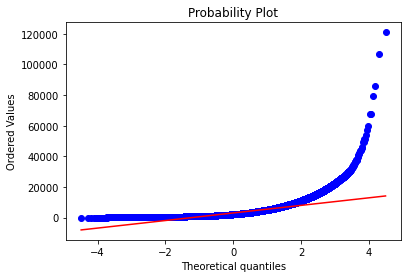

In [15]:
fig = plt.figure()
ax = fig.add_subplot(111)
st.probplot(train['loss'], dist = st.norm, plot = ax)
plt.show()

In [16]:
print('After transformation \n')
print('Loss Skewness ',train['loss'].skew())
print('Loss Kurtosis ',train['loss'].kurt())

After transformation 

Loss Skewness  3.7949583775378604
Loss Kurtosis  48.07956782541841


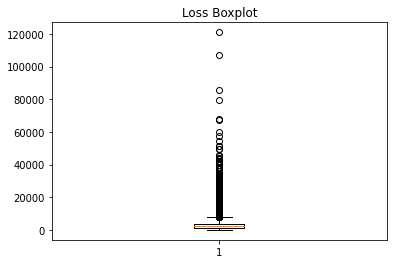

In [17]:
plt.boxplot(train['loss'])
plt.title('Loss Boxplot')
plt.show()

In [18]:
#Create numeric dataframe
numcols=[]
for col in train.columns:
    if col.startswith('cont'):
        numcols.append(col)

In [19]:
#Create categorical dataframe
catcols=[]
for col in train.columns:
    if col.startswith('cat'):
        catcols.append(col)

In [20]:
print("Number of Numerical features: ", len(numcols))

print("Number of Categorical features: ", len(catcols))

Number of Numerical features:  14
Number of Categorical features:  116


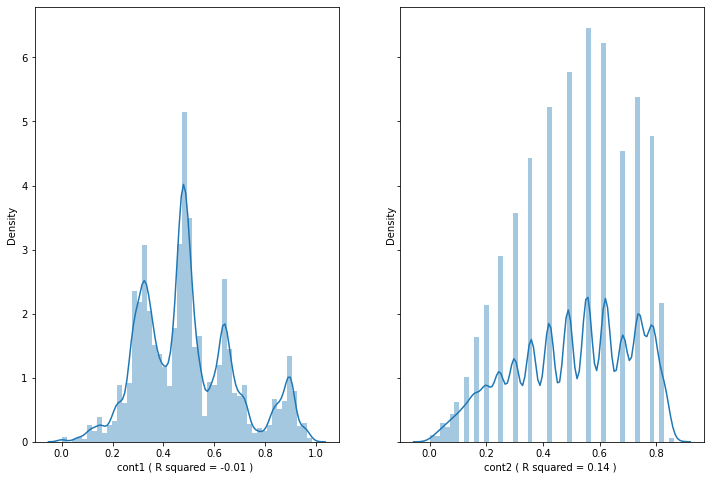

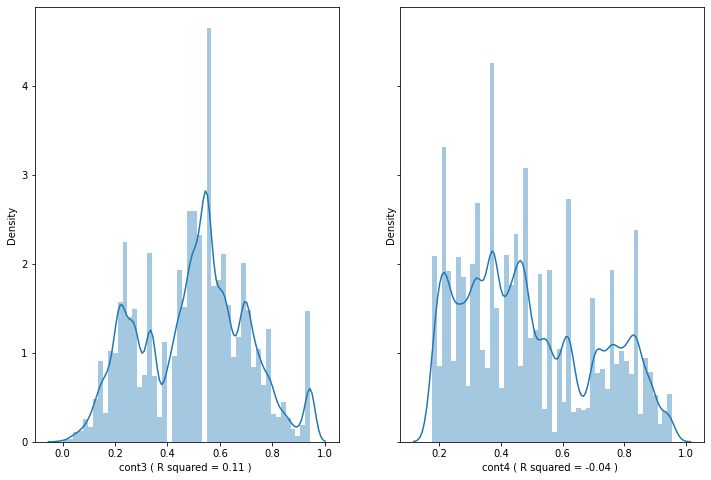

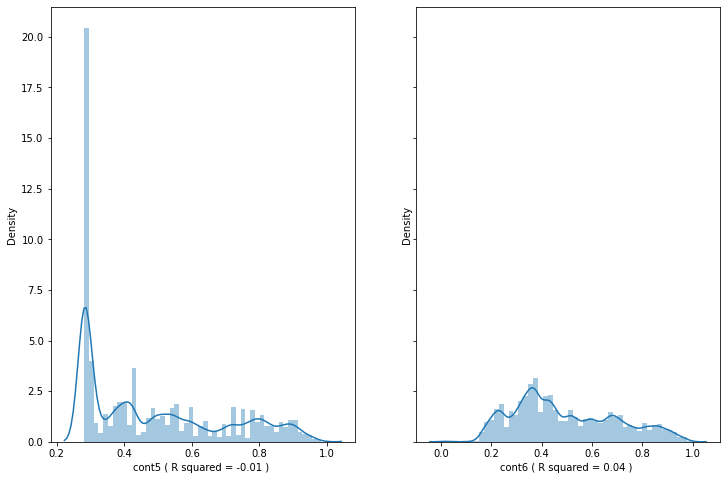

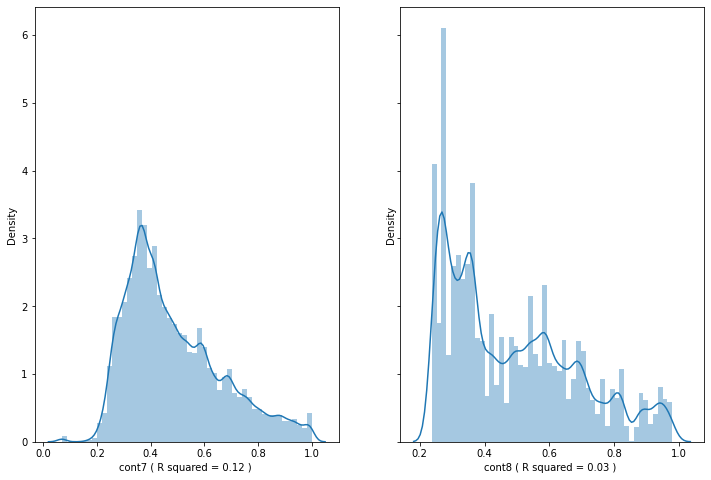

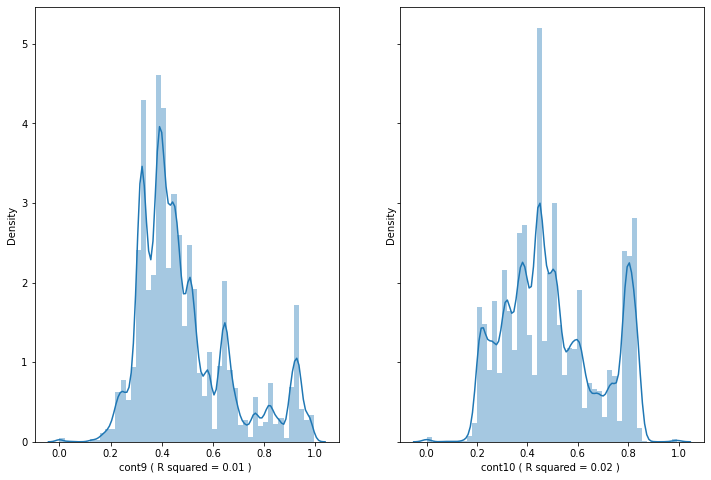

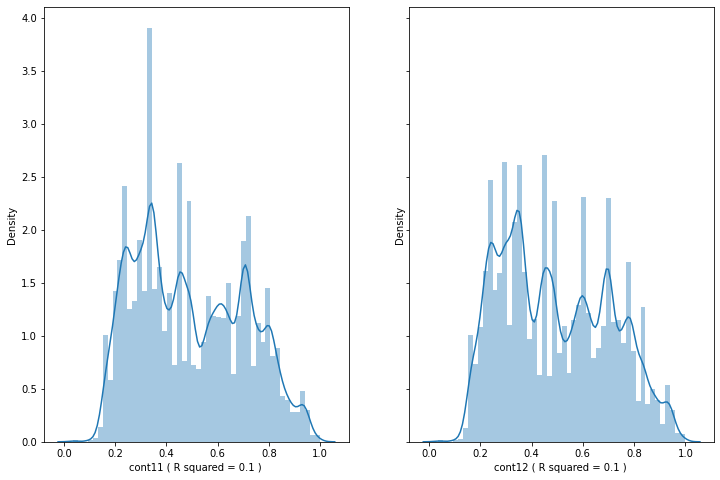

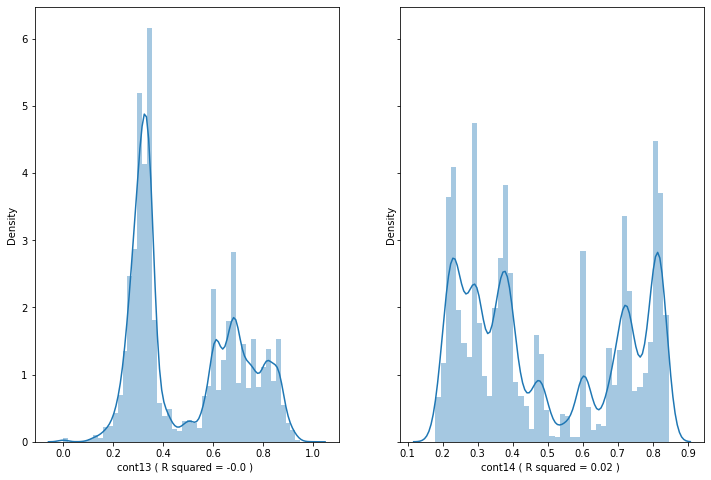

In [21]:
#Visualize numerical histograms
ncol = 2
nrow = 7

for i in range(nrow):
    fig,axs = plt.subplots(nrows=1,ncols=ncol,sharey=True,figsize=(12, 8))
    cols = numcols[i*ncol:ncol*(i+1)]
    for i in range(len(axs)):
        sns.distplot(train[cols[i]], ax=axs[i])
        xlabel=cols[i]+" ( R squared = "+str(round(np.corrcoef(train.loss, train[cols[i]])[0, 1],2))+" ) "
        axs[i].set(xlabel=xlabel, ylabel='Density')

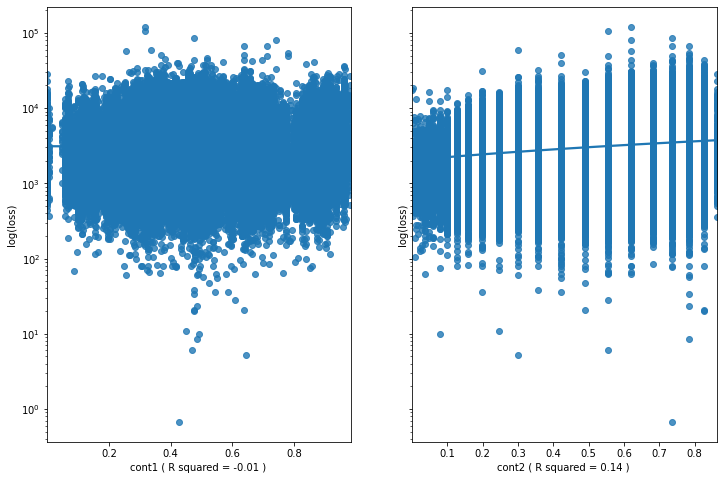

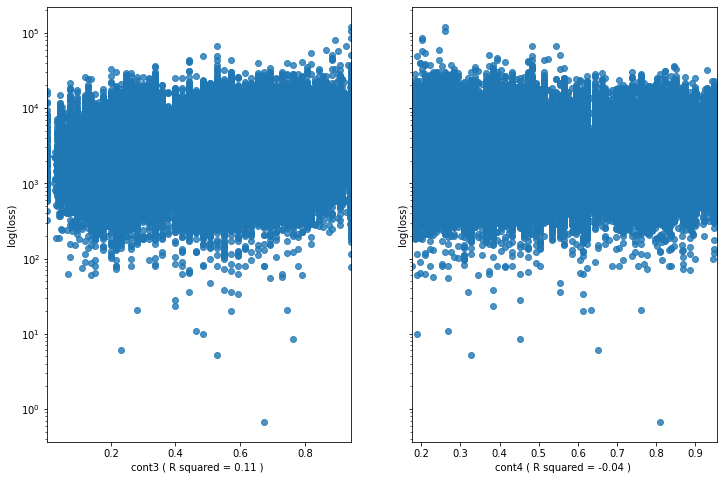

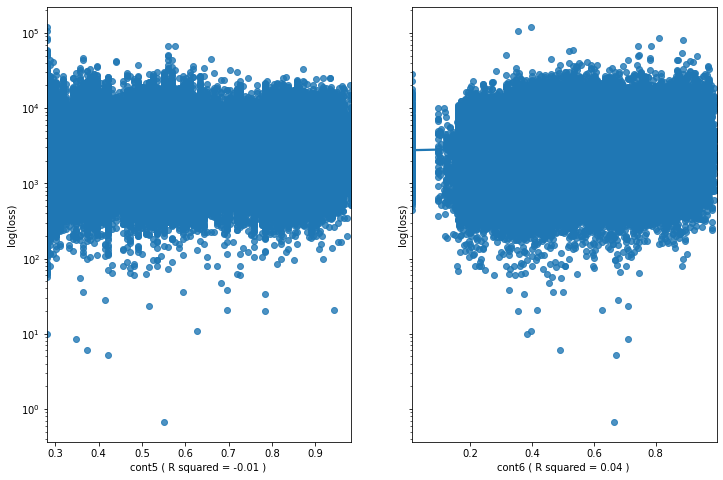

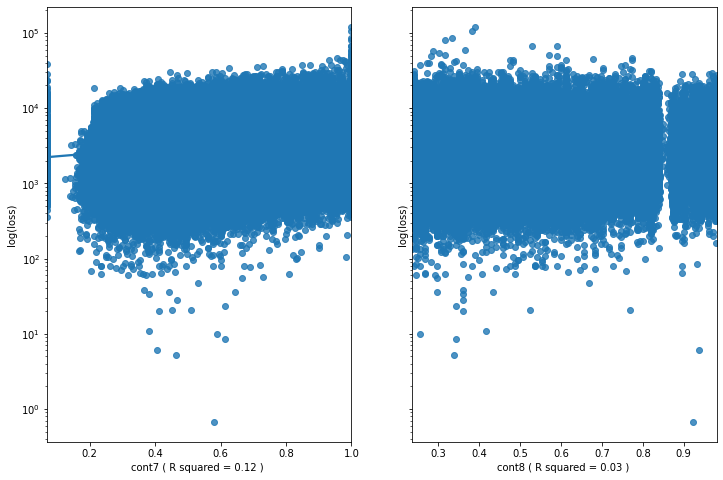

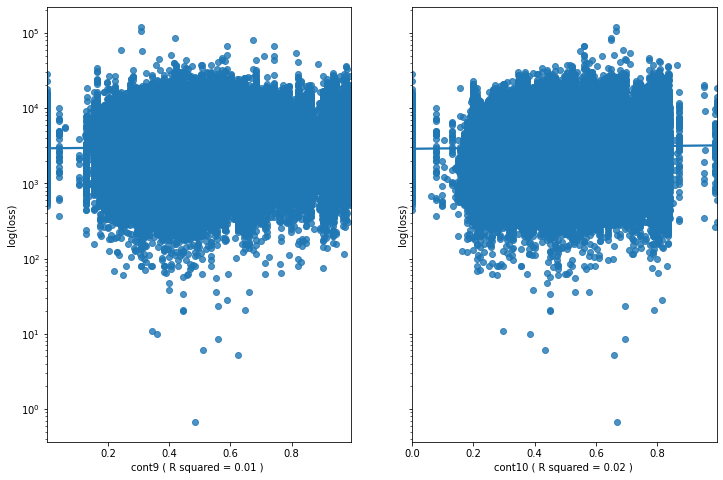

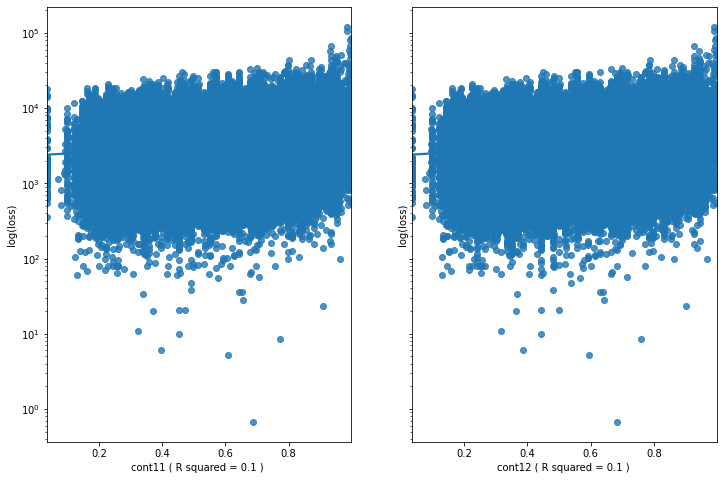

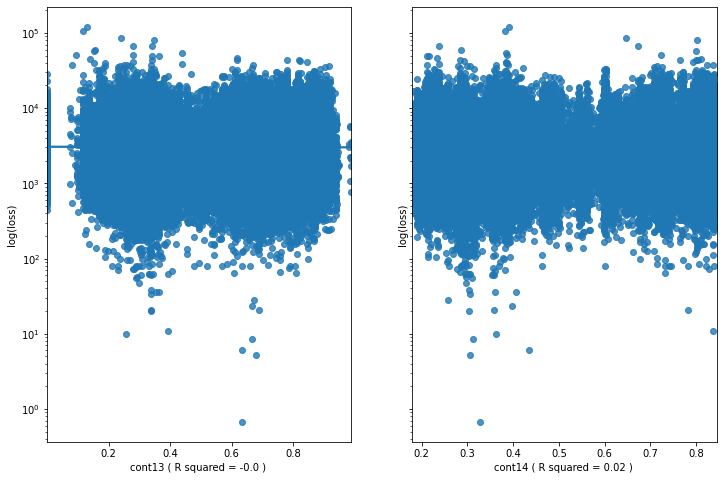

In [22]:
#Scatterplots for numerical data
for i in range(nrow):
    fig,axs = plt.subplots(nrows=1,ncols=ncol,sharey=True,figsize=(12, 8))
    cols = numcols[i*ncol:ncol*(i+1)]
    for i in range(len(axs)):
        axs[i].set(yscale="log")
        sns.regplot(x=cols[i], y="loss", data=train, ax=axs[i])
        xlabel=cols[i]+" ( R squared = "+str(round(np.corrcoef(train.loss, train[cols[i]])[0, 1],2))+" ) "
        axs[i].set(xlabel=xlabel, ylabel='log(loss)')

In [23]:
df_num = train[numcols]
df_num['loss'] = train['loss']
num_corr = df_num.corr()
df_num.head()

,cont1,cont2,cont3,cont4,cont5,cont6,cont7,cont8,cont9,cont10,cont11,cont12,cont13,cont14,loss
0,0.726300,0.245921,0.187583,0.789639,0.310061,0.718367,0.335060,0.30260,0.67135,0.83510,0.569745,0.594646,0.822493,0.714843,2213.18
1,0.330514,0.737068,0.592681,0.614134,0.885834,0.438917,0.436585,0.60087,0.35127,0.43919,0.338312,0.366307,0.611431,0.304496,1283.60
2,0.261841,0.358319,0.484196,0.236924,0.397069,0.289648,0.315545,0.27320,0.26076,0.32446,0.381398,0.373424,0.195709,0.774425,3005.09
3,0.321594,0.555782,0.527991,0.373816,0.422268,0.440945,0.391128,0.31796,0.32128,0.44467,0.327915,0.321570,0.605077,0.602642,939.85
4,0.273204,0.159990,0.527991,0.473202,0.704268,0.178193,0.247408,0.24564,0.22089,0.21230,0.204687,0.202213,0.246011,0.432606,2763.85


In [24]:
#Count null values in numerical data
null_counts = df_num.isnull().sum()
null_counts[null_counts > 0]
df_num.isnull().any().all()

False

In [25]:
df_num.var()

cont1     3.520884e-02
cont2     4.293256e-02
cont3     4.084627e-02
cont4     4.464440e-02
cont5     4.369222e-02
cont6     4.213683e-02
cont7     3.184446e-02
cont8     3.974858e-02
cont9     3.300042e-02
cont10    3.455016e-02
cont11    4.398940e-02
cont12    4.385951e-02
cont13    4.527415e-02
cont14    4.950071e-02
loss      8.433717e+06
dtype: float64

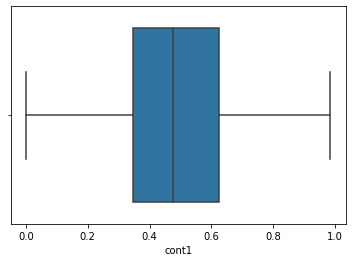

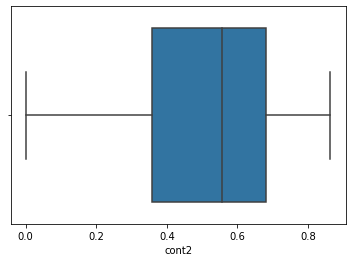

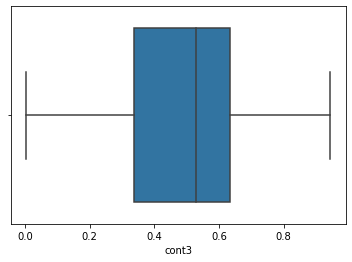

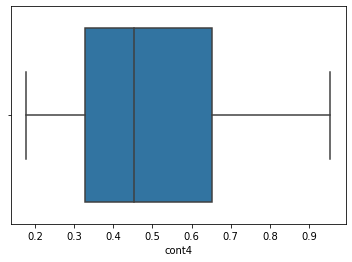

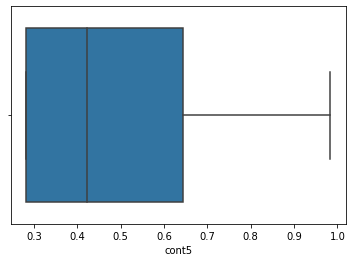

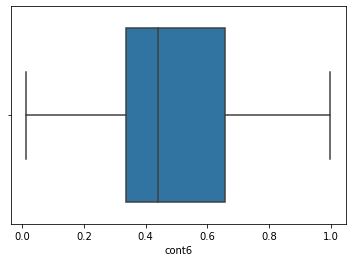

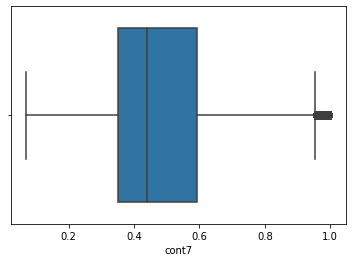

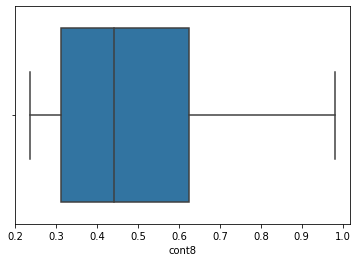

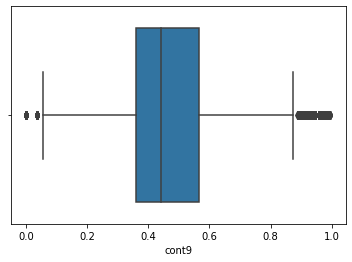

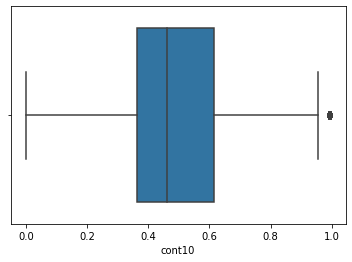

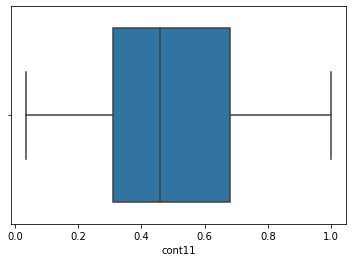

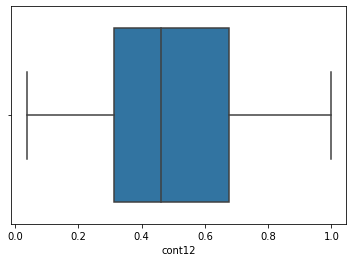

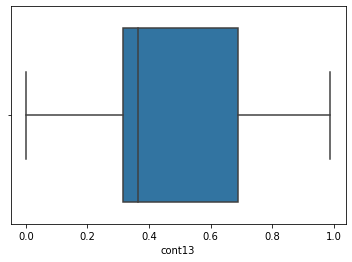

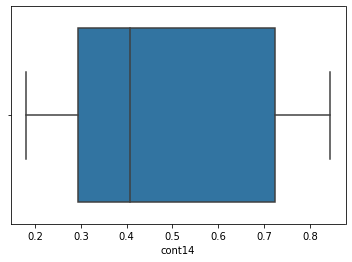

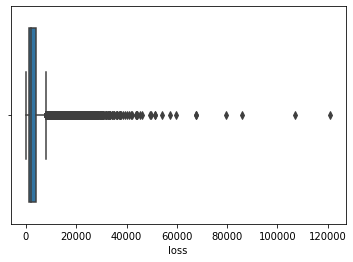

In [26]:
for i in df_num.columns:
    sns.boxplot(df_num[i])
    plt.show()

<AxesSubplot:>

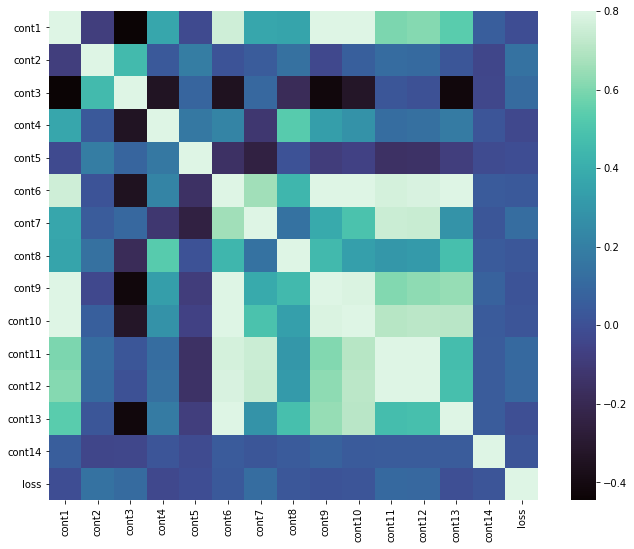

In [27]:
# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(12, 9))

# Draw the heatmap using seaborn
sns.heatmap(num_corr, vmax=.8, square=True, cmap="mako")

In [28]:
#Count null values in categorical data
df_cat = train[catcols]
nulls_counts = df_cat.isnull().sum()
nulls_counts[nulls_counts >0]
df_cat.isnull().any().all()

False

In [29]:
print(train[catcols].apply(pd.Series.nunique))

cat1        2
cat2        2
cat3        2
cat4        2
cat5        2
         ... 
cat112     51
cat113     61
cat114     19
cat115     23
cat116    326
Length: 116, dtype: int64


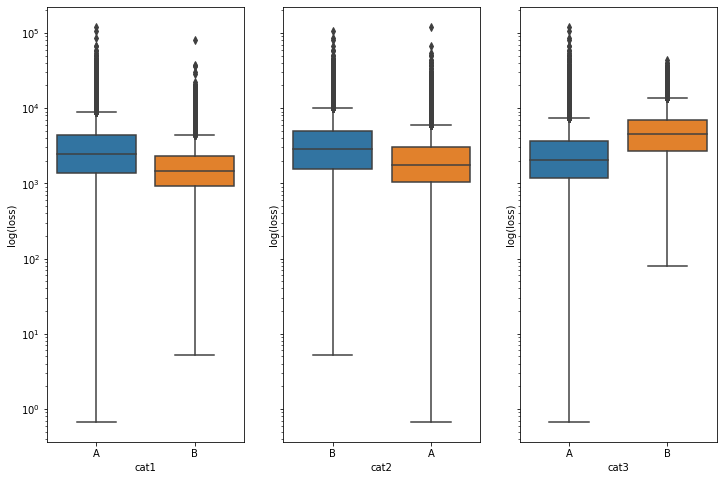

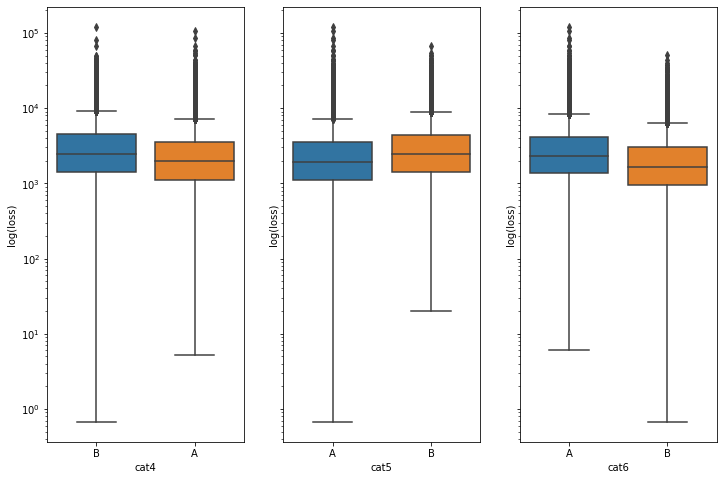

In [30]:
#Create a box plot to compare the categorical data
ncol = 3
nrow = 2

for i in range(nrow):
    fig,axs = plt.subplots(nrows=1,ncols=ncol,sharey=True,figsize=(12, 8))
    cols = catcols[i*ncol:ncol*(i+1)]
    for i in range(len(axs)):
        axs[i].set(yscale="log")
        sns.boxplot(x=cols[i], y="loss", data=train, ax=axs[i])
        axs[i].set(xlabel=cols[i], ylabel='log(loss)')

In [31]:
#label and encode categorical variables
cat_le = df_cat.apply(LabelEncoder().fit_transform)
cat_le.var()

cat1         0.186671
cat2         0.245552
cat3         0.051822
cat4         0.216950
cat5         0.225332
             ...     
cat112     167.851755
cat113     376.056858
cat114       7.152023
cat115       6.056245
cat116    5470.294728
Length: 116, dtype: float64

In [32]:
num_corr.sort_values(['loss'], ascending = False, inplace = True)
num_corr.loss

loss      1.000000
cont2     0.141528
cont7     0.119799
cont3     0.111053
cont11    0.099806
cont12    0.098724
cont6     0.040967
cont8     0.030508
cont10    0.020236
cont14    0.019298
cont9     0.014456
cont13   -0.004022
cont1    -0.010237
cont5    -0.011355
cont4    -0.035831
Name: loss, dtype: float64

In [33]:
#Add Sale Price for correlation
cat_le['loss'] = train['loss']

#find important features in categorical variables
cat_corr = cat_le.corr()
cat_corr.sort_values(['loss'], ascending = False, inplace = True)
cat_corr.loss

loss      1.000000
cat79     0.441172
cat101    0.352646
cat87     0.346311
cat57     0.316736
            ...   
cat6     -0.116883
cat73    -0.154457
cat1     -0.222105
cat81    -0.259191
cat80    -0.473257
Name: loss, Length: 117, dtype: float64

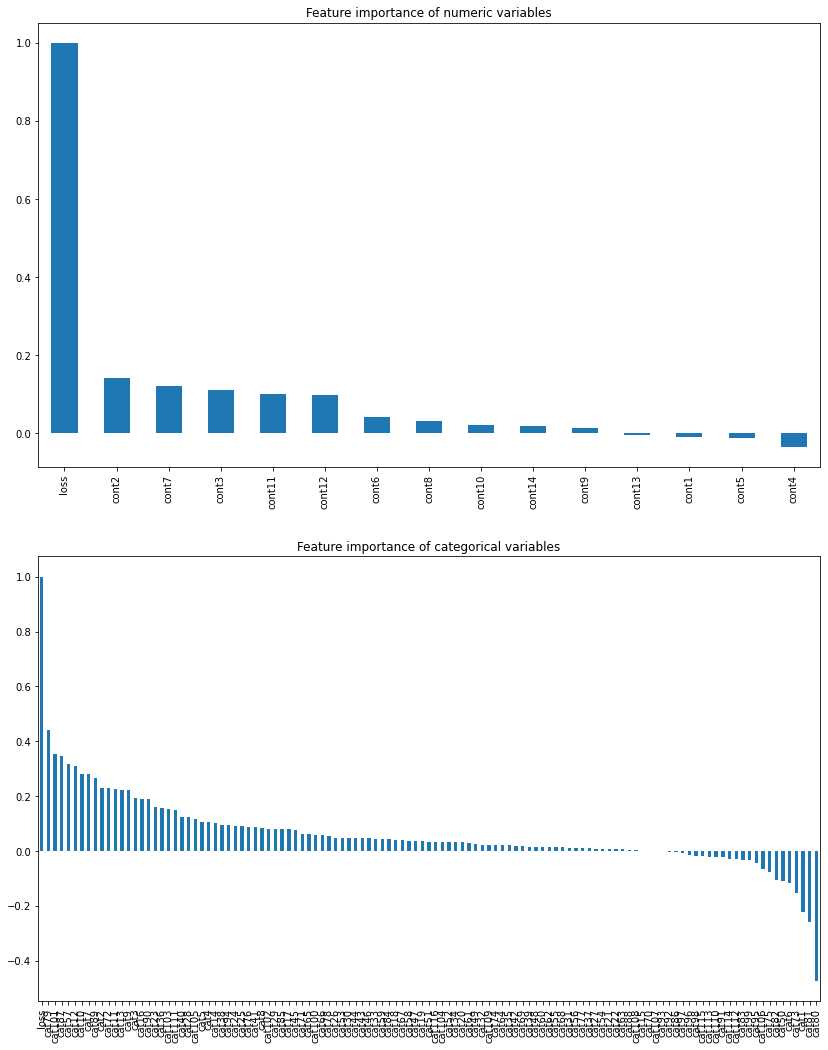

In [34]:
#Visualize variable importance
fig, axarr = plt.subplots(2, 1, figsize = (14, 18))
num_corr.loss.plot.bar(ax=axarr[0])
cat_corr.loss.plot.bar(ax=axarr[1])
axarr[0].set_title("Feature importance of numeric variables")
axarr[1].set_title("Feature importance of categorical variables");

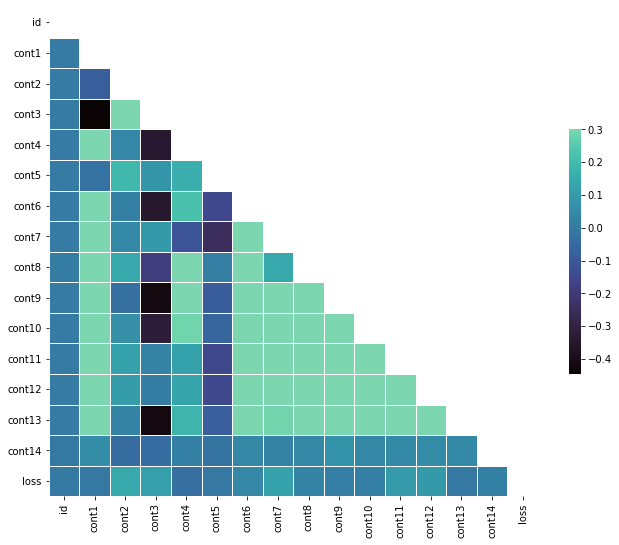

In [35]:
#Visualize Correlations
corr = train.corr()
mask = np.triu(np.ones_like(corr, dtype=bool))
f, ax = plt.subplots(figsize=(11, 9))
sns.heatmap(corr, mask=mask, cmap="mako", vmax=.3, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5});

In [36]:
# Determine less important features
less_important_num = num_corr[num_corr['loss'].abs() < .02].index
less_important_cat = cat_corr[cat_corr['loss'].abs() < .2].index

# Models have performed better with less important variables present.

df_num.drop(less_important_num, axis = 1, inplace = True)

df_cat.drop(less_important_cat, axis = 1, inplace = True)

# list of less important features
less_important = less_important_num.union(less_important_cat)
#drop less important features
train.drop(less_important, axis = 1, inplace = True)

In [37]:
print("Number of Numerical features: ", len(df_num.columns))

print("Number of Categorical features: ", len(df_cat.columns))

Number of Numerical features:  15
Number of Categorical features:  116


In [38]:
train.isnull().any().all()

False

In [39]:
train.columns

Index(['id', 'cat1', 'cat2', 'cat3', 'cat4', 'cat5', 'cat6', 'cat7', 'cat8',
       'cat9',
       ...
       'cont6', 'cont7', 'cont8', 'cont9', 'cont10', 'cont11', 'cont12',
       'cont13', 'cont14', 'loss'],
      dtype='object', length=132)

for i in df_num.columns:
    print(i,' ',
          'Skewness: {:05.2f}'.format(train[i].skew()) , 
          '   ' ,
          'Kurtosis: {:06.2f}'.format(train[i].kurt())  
         )

In [40]:
#Encode the categorical variables
qualitative = df_cat.columns

train[qualitative] = train[qualitative].apply(LabelEncoder().fit_transform)

In [41]:
for i in df_cat.columns:
    print(i,' ',
          'Skewness: {:05.2f}'.format(train[i].skew()) , 
          '   ' ,
          'Kurtosis: {:06.2f}'.format(train[i].kurt())  
         )

cat1   Skewness: 01.16     Kurtosis: -00.64
cat2   Skewness: 00.27     Kurtosis: -01.93
cat3   Skewness: 03.91     Kurtosis: 013.30
cat4   Skewness: 00.78     Kurtosis: -01.39
cat5   Skewness: 00.66     Kurtosis: -01.56
cat6   Skewness: 00.87     Kurtosis: -01.24
cat7   Skewness: 06.18     Kurtosis: 036.20
cat8   Skewness: 03.76     Kurtosis: 012.11
cat9   Skewness: 00.41     Kurtosis: -01.83
cat10   Skewness: 01.97     Kurtosis: 001.88
cat11   Skewness: 02.54     Kurtosis: 004.47
cat12   Skewness: 01.95     Kurtosis: 001.79
cat13   Skewness: 02.61     Kurtosis: 004.79
cat14   Skewness: 08.93     Kurtosis: 077.72
cat15   Skewness: 74.40     Kurtosis: 5533.91
cat16   Skewness: 05.11     Kurtosis: 024.12
cat17   Skewness: 11.87     Kurtosis: 138.87
cat18   Skewness: 13.70     Kurtosis: 185.81
cat19   Skewness: 10.06     Kurtosis: 099.17
cat20   Skewness: 30.33     Kurtosis: 918.15
cat21   Skewness: 21.28     Kurtosis: 450.99
cat22   Skewness: 66.16     Kurtosis: 4374.60
cat23   Skewness:

In [42]:
#Re-intialize Independent and dependent variables
x = train.drop(['loss'], axis = 1)
y = train['loss']

In [43]:
skewed = train.skew().abs() 
values = skewed[skewed >1]

In [44]:
#Determine features to transform
feature_transformation = values.index
feature_transformation

Index(['cat1', 'cat3', 'cat7', 'cat8', 'cat10', 'cat11', 'cat12', 'cat13',
       'cat14', 'cat15', 'cat16', 'cat17', 'cat18', 'cat19', 'cat20', 'cat21',
       'cat22', 'cat23', 'cat24', 'cat25', 'cat26', 'cat27', 'cat28', 'cat29',
       'cat30', 'cat31', 'cat32', 'cat33', 'cat34', 'cat35', 'cat36', 'cat37',
       'cat38', 'cat39', 'cat40', 'cat41', 'cat42', 'cat43', 'cat44', 'cat45',
       'cat46', 'cat47', 'cat48', 'cat49', 'cat50', 'cat51', 'cat52', 'cat53',
       'cat54', 'cat55', 'cat56', 'cat57', 'cat58', 'cat59', 'cat60', 'cat61',
       'cat62', 'cat63', 'cat64', 'cat65', 'cat66', 'cat67', 'cat68', 'cat69',
       'cat70', 'cat71', 'cat73', 'cat74', 'cat75', 'cat76', 'cat77', 'cat78',
       'cat79', 'cat80', 'cat81', 'cat82', 'cat83', 'cat84', 'cat85', 'cat87',
       'cat88', 'cat89', 'cat90', 'cat91', 'cat93', 'cat96', 'cat99', 'cat101',
       'cat102', 'cat103', 'cat105', 'cat111', 'cat114', 'cont9', 'loss'],
      dtype='object')

In [45]:
#Scale and clean the remaining variables
def transform(feature):
    train[feature] = np.log1p(train[feature])
    
transform(feature_transformation)

In [46]:
#Find outliers determined by z score
z = np.abs(st.zscore(train['loss']))
outliers = np.where(z > 3)
outliers

(array([    89,    713,    867,   1015,   2161,   2535,   2657,   3182,
          3225,   3662,   4305,   4545,   5258,   6735,   6809,   7764,
          8080,   8215,   8526,   8628,   8823,   9420,   9921,  10331,
         10684,  10718,  11271,  11813,  12133,  12314,  13030,  13066,
         14010,  14145,  14578,  14969,  15984,  16833,  17256,  17262,
         21604,  21685,  22045,  22164,  23693,  24764,  25215,  25319,
         25336,  25810,  28000,  29303,  29521,  29669,  30536,  31613,
         31690,  32119,  32881,  33126,  33175,  33378,  33428,  33661,
         33937,  34011,  34175,  34989,  35050,  35107,  35164,  35201,
         35202,  35673,  35736,  37627,  37895,  39309,  40351,  41287,
         41382,  41987,  43050,  43087,  43172,  43809,  43916,  44732,
         45631,  46307,  47687,  48107,  48369,  48539,  48920,  49280,
         49339,  49516,  49554,  49616,  50282,  50502,  50609,  50648,
         51078,  51662,  51671,  52603,  53322,  53329,  53347, 

In [47]:
#Remove outliers from dependent and independent variable
#x = x.drop(x.index[outliers])
#y = y.drop(y.index[outliers])

In [48]:
x.shape, y.shape

((188318, 131), (188318,))

In [49]:
x_train, x_test, y_train, y_test = train_test_split(x, y, random_state = 40)

In [50]:
scaler = MinMaxScaler()
x_train = scaler.fit_transform(x_train)
x_test = scaler.transform(x_test)

In [51]:
#Clean NaN values created from the scaler
x_train[np.isnan(x_train)] = np.median(x_train[~np.isnan(x_train)])
x_test [np.isnan(x_test)] = np.median(x_test[~np.isnan(x_test)])

In [52]:
from sklearn.linear_model import LinearRegression 
from sklearn.linear_model import Ridge 
from sklearn.linear_model import Lasso
from sklearn.linear_model import ElasticNet
from sklearn.linear_model import SGDRegressor
from sklearn.pipeline import Pipeline
from sklearn.model_selection import KFold
from sklearn.model_selection import GridSearchCV

In [53]:
models = []
models.append(('LinearRegression', Pipeline([('LinearRegression', LinearRegression())])))
models.append(('Ridge', Pipeline([('Ridge', Ridge())])))
models.append(('Lasso', Pipeline([('Lasso', Lasso())])))
models.append(('ElasticNet', Pipeline([('Elastic', ElasticNet())])))
models.append(('SGD', Pipeline([('SGD', SGDRegressor())])))

In [54]:
#initialize sklearn pipeline to score models prior to tuning
#Lasso and SGD have negative scores.
# Negative scores indicate that the default learning rate is too high.
import warnings
warnings.filterwarnings(action='ignore')
seed = 4
splits = 10
models_score ={}
for i in models:
    kfold = KFold(n_splits=splits, random_state=seed, shuffle=True)
    results = cross_val_score(i[1], x_train, y_train, cv=kfold)
    models_score.update({i[0] : results.mean()})
    
sorted(models_score.items(), key= lambda v:v[1], reverse=True)

[('Ridge', 0.4863633940357537),
 ('LinearRegression', 0.48631739357603454),
 ('SGD', 0.47772421749008326),
 ('Lasso', -0.00012663053952817195),
 ('ElasticNet', -0.00012663053952817195)]

In [55]:
#Build model function for models to produce scores and error
def model_evaluate(y_true, y_pred):
    r2 = r2_score(y_true, y_pred)
    mae = mean_absolute_error(y_true, y_pred)
    mse = mean_squared_error(y_true, y_pred)
    rmse = np.sqrt(mean_squared_error(y_true, y_pred))
    return r2, mae, mse, rmse

In [56]:
#Ridge regression model
ridge_reg = linear_model.Ridge(alpha=.1).fit(x_train, y_train)
cv_r2 = cross_val_score(ridge_reg, x_train, y_train, cv = 10)
y_preds = ridge_reg.predict(x_test)
cv_r2 = np.mean(cv_r2)
print("Cross val score: " + str(cv_r2))
r2, mae, mse, rmse = model_evaluate(y_test, y_preds)
print("R^2 score: " + str(r2))
print("Mean Absolute Error: " + str(mae))
print("Mean Squared Error: " + str(mse))
print("Root Mean Squared Error: " + str(rmse))

Cross val score: 0.486365997728479
R^2 score: 0.4859435619516894
Mean Absolute Error: 0.4558666122467366
Mean Squared Error: 0.335890224516646
Root Mean Squared Error: 0.5795603717617743


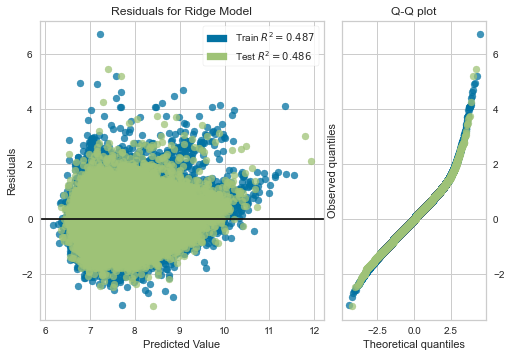

<AxesSubplot:title={'center':'Residuals for Ridge Model'}, xlabel='Predicted Value', ylabel='Residuals'>

In [57]:
#Examine residuals of ridge regression model
from yellowbrick.regressor import ResidualsPlot
visualizer = ResidualsPlot(ridge_reg,hist=False, qqplot=True)

visualizer.fit(x_train, y_train)  # Fit the training data to the visualizer
visualizer.score(x_test, y_test)  # Evaluate the model on the test data
visualizer.show()  

In [58]:
#Build Lasso Model
#Lasso model required smaller alpha to better fit to data
lasso_reg = linear_model.Lasso(alpha=.001, random_state = 40).fit(x_train, y_train)
cv_r2 = cross_val_score(lasso_reg, x_train, y_train, cv = 10)
y_preds = lasso_reg.predict(x_test)
cv_r2 = np.mean(cv_r2)
print("Cross val score: " + str(cv_r2))
r2, mae, mse, rmse = model_evaluate(y_test, y_preds)
print("R^2 score: " + str(r2))
print("Mean Absolute Error: " + str(mae))
print("Mean Squared Error: " + str(mse))
print("Root Mean Squared Error: " + str(rmse))

Cross val score: 0.4807892527534894
R^2 score: 0.4795145479672339
Mean Absolute Error: 0.45905238139659454
Mean Squared Error: 0.34009101413978166
Root Mean Squared Error: 0.5831732282433597


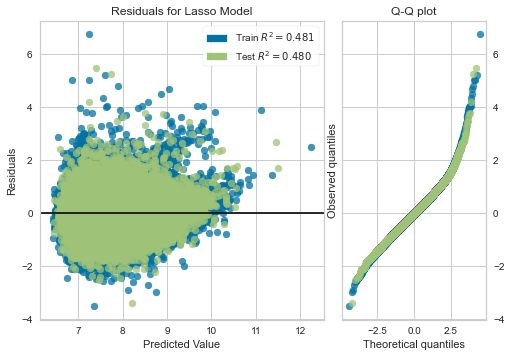

<AxesSubplot:title={'center':'Residuals for Lasso Model'}, xlabel='Predicted Value', ylabel='Residuals'>

In [59]:
visualizer = ResidualsPlot(lasso_reg,hist=False, qqplot=True)

visualizer.fit(x_train, y_train)  # Fit the training data to the visualizer
visualizer.score(x_test, y_test)  # Evaluate the model on the test data
visualizer.show()  

In [60]:
#Build ElasticNet Model
#ElasticNet also required a smaller alpha
elastic_net = linear_model.ElasticNet(alpha=.001, random_state = 40).fit(x_train, y_train)
cv_r2 = cross_val_score(elastic_net, x_train, y_train, cv = 10)
y_preds = elastic_net.predict(x_test)
cv_r2 = np.mean(cv_r2)
print("Cross val score: " + str(cv_r2))
r2, mae, mse, rmse = model_evaluate(y_test, y_preds)
print("R^2 score: " + str(r2))
print("Mean Absolute Error: " + str(mae))
print("Mean Squared Error: " + str(mse))
print("Root Mean Squared Error: " + str(rmse))

Cross val score: 0.4835862995729315
R^2 score: 0.4825097040216063
Mean Absolute Error: 0.45761453413374004
Mean Squared Error: 0.33813394568366983
Root Mean Squared Error: 0.5814928595293926


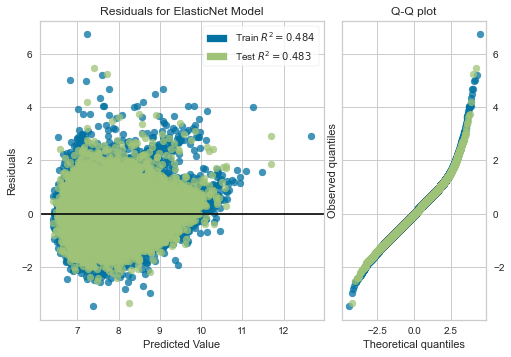

<AxesSubplot:title={'center':'Residuals for ElasticNet Model'}, xlabel='Predicted Value', ylabel='Residuals'>

In [61]:
visualizer = ResidualsPlot(elastic_net,hist=False, qqplot=True)

visualizer.fit(x_train, y_train)  # Fit the training data to the visualizer
visualizer.score(x_test, y_test)  # Evaluate the model on the test data
visualizer.show()  

In [ ]:
#Prepare dataframe for submission
model = linear_model.Lasso(alpha=.001).fit(x_test, y_test)
x_all = np.concatenate((x_train, x_test))
y_preds = model.predict(x_all)
predictions = y_preds[:125546:]
predictions = np.exp(predictions)
result_df = pd.DataFrame(columns=['Id', 'loss'])
result_df.Id = sample_submission.id
result_df.loss= predictions

In [ ]:
result_df.shape

In [ ]:
result_df.to_csv('output.csv', index=False)

In [ ]:
result_df.head()

In [ ]:
#Create list of relevant hyperparameters for ElasticNet through gridsearch
param_grid_1 = {
	'alpha':[.01, .001 ,.0001, .00001],
	'l1_ratio':[0,.1,.2,.3,.4,.5,.6,.7,.8,.9,1],
    'normalize':[True,False]    
}

#Instantiate GridSearchCV with ElasticNet, the parameter values
gs = GridSearchCV(ElasticNet(),param_grid_1,cv=10,verbose=1)

#Fitting gridsearch model
gs.fit(x_train,y_train)

Fitting 10 folds for each of 88 candidates, totalling 880 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


In [ ]:
#Returns the best parameters
gs.best_params_

In [ ]:
gs.score(x_test,y_test)

In [ ]:
#Build new ElasticNet Model based on parameters from gridsearch
elastic_net = linear_model.ElasticNet(alpha=.001, random_state = 40).fit(x_train, y_train)
cv_r2 = cross_val_score(elastic_net, x_train, y_train, cv = 10)
y_preds = elastic_net.predict(x_test)
cv_r2 = np.mean(cv_r2)
print("Cross val score: " + str(cv_r2))
r2, mae, mse, rmse = model_evaluate(y_test, y_preds)
print("R^2 score: " + str(r2))
print("Mean Absolute Error: " + str(mae))
print("Mean Squared Error: " + str(mse))
print("Root Mean Squared Error: " + str(rmse))

In [ ]:
#Package best ElasticNet model for submission
model = linear_model.ElasticNet(alpha = 0.001, l1_ratio = 0.8, normalize = False).fit(x_test, y_test)
x_all = np.concatenate((x_train, x_test))
y_preds = model.predict(x_all)
predictions = y_preds[:125546:]
predictions = np.exp(predictions)
result_df2 = pd.DataFrame(columns=['Id', 'SalePrice'])
result_df2.Id = sample_submission.Id
result_df2.SalePrice = predictions

In [ ]:
result_df2.shape

In [ ]:
result_df2.to_csv('submission.csv', index=False)

In [ ]:
result_df2.head()